```
Q2. Write a Python function to estimate the population mean using a sample mean and standard deviation

sample_mean = 75.8
sample_std_dev = 5
sample_size = 80
population_size = 2000

```



In [6]:
import math
from scipy.stats import t

def estimate_population_mean(sample_mean, sample_std_dev, sample_size, population_size, confidence=0.95):
    """
    Estimate the population mean with a confidence interval using finite population correction.
    """
    # t-critical value
    t_value = t.ppf((1 + confidence) / 2, df=sample_size - 1)

    # Standard error with finite population correction
    fpc = math.sqrt((population_size - sample_size) / population_size)
    standard_error = (sample_std_dev / math.sqrt(sample_size)) * fpc

    margin_of_error = t_value * standard_error

    lower = sample_mean - margin_of_error
    upper = sample_mean + margin_of_error

    return (lower, upper)




sample_mean = 75.8
sample_std_dev = 5
sample_size = 80
population_size = 2000

estimate_mean = estimate_population_mean(sample_mean, sample_std_dev, sample_size, population_size)
display(estimate_mean)

(np.float64(74.70978552026605), np.float64(76.89021447973394))

Q5. Write a Python script to conduct a hypothesis test on the difference between two population means, given a sample from each population.
We can use the following formula to calculate the t-statistic:


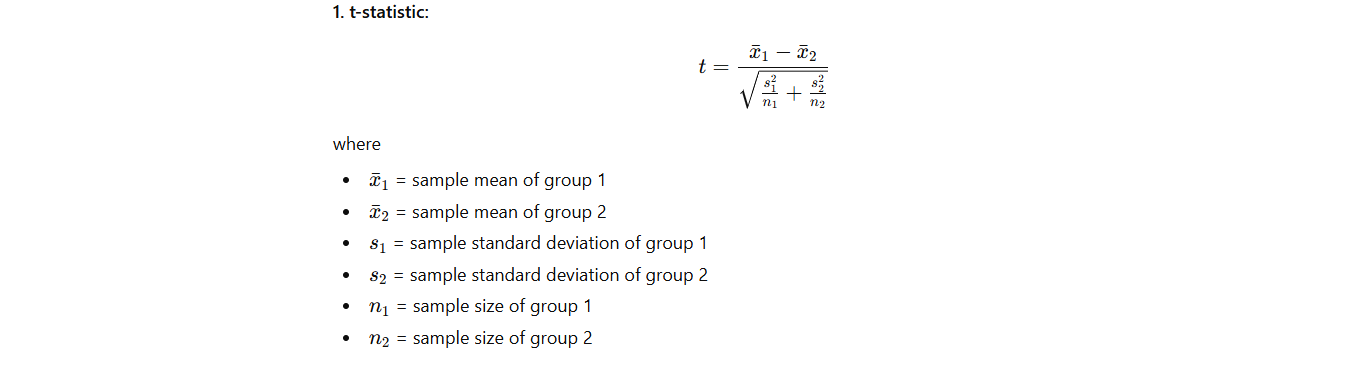




In [11]:
import numpy as np
from scipy.stats import t  # Needed for t.cdf and t.ppf

def two_sample_t_test(sample1, sample2, alpha=0.05):
    """
    Conducts an independent two-sample t-test.

    Parameters:
        sample1 (array-like): Sample data from the first population.
        sample2 (array-like): Sample data from the second population.
        alpha (float, optional): Significance level for the test. Default is 0.05.

    Returns:
        result (dict): A dictionary containing the t-test results.
    """

    # Convert samples to numpy arrays
    sample1 = np.array(sample1)
    sample2 = np.array(sample2)

    # --- Calculate Mean and Standard Deviation ---
    sample1_mean = np.mean(sample1)
    sample2_mean = np.mean(sample2)
    sample1_std = np.std(sample1, ddof=1)
    sample2_std = np.std(sample2, ddof=1)

    # --- Degrees of Freedom ---
    n1 = len(sample1)
    n2 = len(sample2)
    df = n1 + n2 - 2

    # --- Hypotheses ---
    null_hypothesis = "The population means of the two samples are EQUAL"
    alt_hypothesis = "The population means of the two samples are NOT equal"

    # --- Calculate the Pooled Standard Deviation ---
    pooled_std = np.sqrt((((n1 - 1) * sample1_std ** 2) + ((n2 - 1) * sample2_std ** 2)) / df)

    # --- Calculate the t-statistic ---
    t_stat = (sample1_mean - sample2_mean) / (pooled_std * np.sqrt((1 / n1) + (1 / n2)))

    # --- Calculate p-value and critical t-value ---
    p_value = 1 - t.cdf(abs(t_stat), df=df)
    t_crit = t.ppf(1 - alpha / 2, df=df)

    # --- Conclusion ---
    if abs(t_stat) >= t_crit:
        conclusion = "Reject the null hypothesis: " + null_hypothesis
    else:
        conclusion = "Fail to reject the null hypothesis: " + alt_hypothesis

    # --- Store and return results ---
    result = {
        "t_statistic": t_stat,
        "critical_t": t_crit,
        "p_value": p_value,
        "conclusion": conclusion
    }

    return result


# --- Example Usage ---
sample1 = [30, 34, 35, 40, 32]
sample2 = [20, 28, 25, 36, 39]
alpha = 0.05

result = two_sample_t_test(sample1, sample2, alpha)

print(result)


{'t_statistic': np.float64(1.1837755291064513), 'critical_t': np.float64(2.306004135204166), 'p_value': np.float64(0.13524031253378244), 'conclusion': 'Fail to reject the null hypothesis: The population means of the two samples are NOT equal'}


Q13. A coffee shop owner wants to estimate the average daily revenue for their shop. They take a random sample of 50 days and find the sample mean revenue to be 500 dollar with a standard deviation of 50dollar. Estimate the population mean revenue with a 95% confidence interval.

In [20]:
import numpy as np
import math
import scipy.stats as stats

mean = 500
std = 50
n = 50
ci = 0.95
alpha = 1-ci
dof = n-1

t_crit = stats.t.ppf(1 - alpha/2, dof)

std_error = std/math.sqrt(n)
margin_of_error = t_crit * std_error


lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

print(f'${lower_bound} ${upper_bound}')

$485.79015722521353 $514.2098427747865


Q14. A researcher hypothesizes that a new drug will decrease blood pressure by 10 mmHg. They conduct aclinical trial with 100 patients and find that the sample mean decrease in blood pressure is 8 mmHg with a standard deviation of 3 mmHg. Test the hypothesis with a significance level of 0.05.

In [22]:
import math
import scipy.stats as stats

n= 100 #samplesize
null_hypothesis = "The new drug causes an average decrease of 10mmHg in blood pressure"
alternate_hypothesis = "The new drug causes an average decrease of less than 10mmHg in blood pressure "
sample_mean = 8 #sample mean
pop_mean= 10 #population mean
sample_std = 3 #sample standard deviation
alpha = 0.05 #significance level
dof = n-1 #degree of freedom


#calculating t and p value
t_value = (sample_mean-pop_mean)/(sample_std/math.sqrt(n))
p_value = stats.t.cdf(t_value,df = n-1)

#comparing p value and significance level
if p_value < alpha:
    print(f"The p-value is {p_value}, which is less than the significance level of {alpha}.")
    print(f"Reject the null hypothesis: {null_hypothesis}.")
else:
    print(f"The p-value is {p_value}, which is greater than the significance level of {significance_level}.")
    print(f"Fail to reject the null hypothesis: {null_hypothesis}.")

The p-value is 7.506144504985108e-10, which is less than the significance level of 0.05.
Reject the null hypothesis: The new drug causes an average decrease of 10mmHg in blood pressure.


Q16. Two groups of students are given different study materials to prepare for a test. The first group (n1 =30) has a mean score of 80 with a standard deviation of 10, and the second group (n2 = 40) has a mean score of 75 with a standard deviation of 8. Test the hypothesis that the population means for the two groups are equal with a significance level of 0.01.

In [28]:
import numpy as np
import scipy.stats as stats
import math

n1 = 30
mean1 = 80
std1 = 10

n2 = 40
mean2 = 75
std2 = 8

dof = n1 + n2 - 2
alpha = 0.01
confidence_interval = 1 - alpha

pooled_std = np.sqrt(((n1 - 1)*std1**2 + (n2 - 1)*std2**2) / dof)
t_val = (mean1 - mean2) / (pooled_std * math.sqrt(1/n1 + 1/n2))
p_value = 2 * (1 - stats.t.cdf(abs(t_val), df=dof))

print("t-value:", t_val)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject Hypothesis")
else:
    print("Accept Hypothesis")


t-value: 2.3239677296992913
p-value: 0.023123013413725912
Accept Hypothesis


Q17. A marketing company wants to estimate the average number of ads watched by viewers during a TV program. They take a random sample of 50 viewers and find that the sample mean is 4 with a standard deviation of 1.5. Estimate the population mean with a 99% confidence interval.

In [36]:
import numpy as np
import math
from scipy.stats import norm

n= 50
mean = 4
std = 1.5

ci = 0.99
alpha = 1-ci

standard_error = std / math.sqrt(n)
z_val = norm.ppf(1 - alpha/2)
margin_error = z_val * standard_error

lower_bound = mean - margin_error
upper_bound = mean + margin_error

print(f"{lower_bound}, {upper_bound}")


3.4535840896844654, 4.546415910315535
